In [21]:
import pandas as pd
import numpy as np
import wquantiles
from scipy.stats import trim_mean
import seaborn as sns

In [22]:
state = pd.read_csv('data/state.csv')
state['Population'].mean()

np.float64(6162876.3)

In [23]:
trim_mean(state['Population'], 0.1)

np.float64(4783697.125)

In [24]:
state['Population'].median()

np.float64(4436369.5)

In [25]:
np.average(state['Murder.Rate'], weights=state['Population'])

np.float64(4.445833981123393)

In [26]:
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

np.float64(4.4)

In [27]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

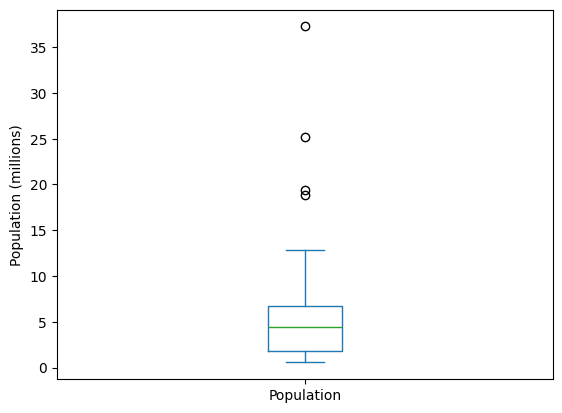

In [28]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

In [29]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

Text(0.5, 0, 'Population (millions)')

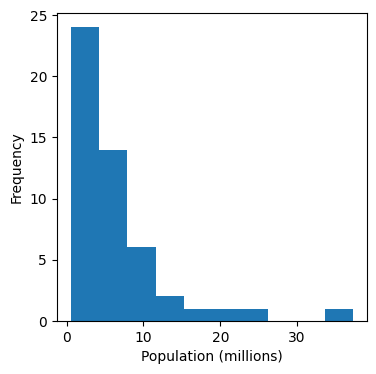

In [30]:
ax = (state['Population']/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population (millions)')

Text(0.5, 0, 'Murder Rate (per 100,000)')

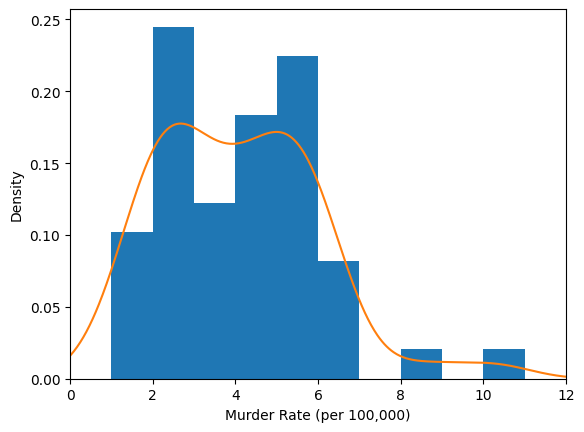

In [31]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

Text(0, 0.5, 'Count')

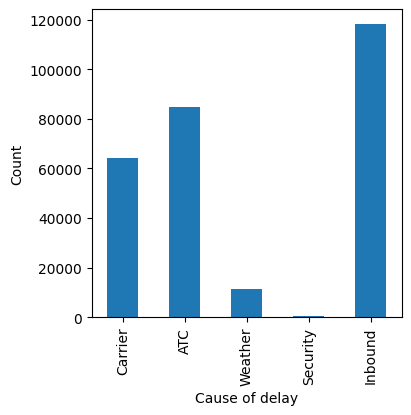

In [32]:
dfw = pd.read_csv("data/dfw_airline.csv")

ax = dfw.transpose().plot.bar(figsize=(4,4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

In [33]:
kc_tax = pd.read_csv("data/kc_tax.csv")

kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 7500000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]

kc_tax0.shape

(463719, 3)

Text(0, 0.5, 'Tax-Assessed Value')

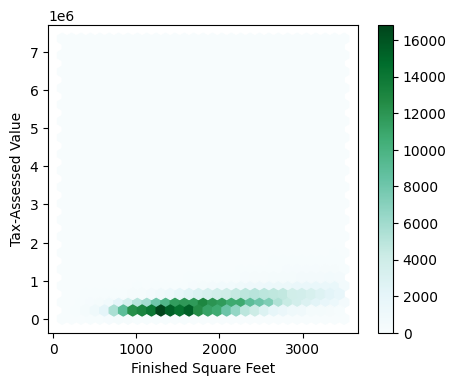

In [34]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5,4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

Text(0, 0.5, 'Daily % of Delayed Flights')

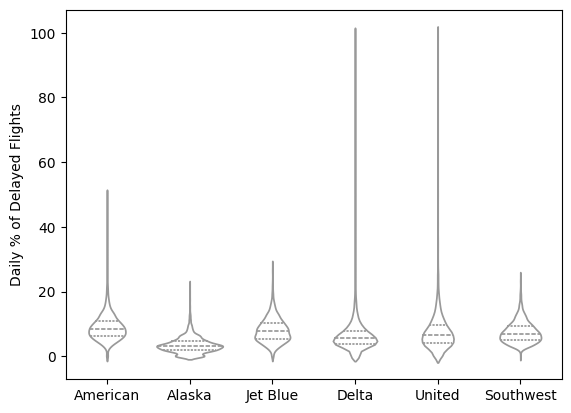

In [39]:
airline_stats = pd.read_csv('data/airline_stats.csv')

ax = sns.violinplot(x=airline_stats.airline, y=airline_stats.pct_carrier_delay,
                    inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')